In [1]:
# Install Python Dependencies, JDK, and H2O for Python
# !pip install requests tabulate "colorama>=0.3.8" future mlflow
# !apt-get update && apt install default-jdk
# !pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

# H2O AutoML w/MLFlow

References:

* http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
* https://github.com/h2oai/h2o-tutorials/tree/master/h2o-world-2017/automl

## Start H2O

Import H2O python modules first, then initialize a H2O instance.

In [2]:
import h2o
from h2o.automl import H2OAutoML, get_leaderboard

In [3]:
# Start H2O instance
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxiq2hlxc
  JVM stdout: /tmp/tmpxiq2hlxc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxiq2hlxc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,1 month and 12 days
H2O cluster name:,H2O_from_python_unknownUser_5b5zax
H2O cluster total nodes:,1
H2O cluster free memory:,498 Mb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


## Data Preparation

We take [Higgs Dataset (Higgs Boson classification dataset)](https://archive.ics.uci.edu/ml/datasets/HIGGS) as a demostration.

In [4]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


## Use H2O AutoML module to train models

In [5]:
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1337)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


## Observe models

### Get model metrics by getting the Leaderboard

Get the top experiments by reading the Leaderboard.

In [6]:
# Get basic Leaderboard
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200318_085617,0.788494,0.553656,0.806794,0.319353,0.433116,0.18759
StackedEnsemble_BestOfFamily_AutoML_20200318_085617,0.786347,0.555761,0.804659,0.315266,0.434086,0.188431
XGBoost_1_AutoML_20200318_085617,0.784169,0.555429,0.804717,0.318868,0.434427,0.188726
XGBoost_3_AutoML_20200318_085617,0.782974,0.558924,0.801905,0.311213,0.435598,0.189746
XGBoost_2_AutoML_20200318_085617,0.782565,0.557239,0.800632,0.335346,0.435148,0.189354
GBM_5_AutoML_20200318_085617,0.780062,0.559536,0.799004,0.336324,0.436322,0.190377
GBM_1_AutoML_20200318_085617,0.778358,0.561238,0.797036,0.338392,0.437122,0.191075
GBM_2_AutoML_20200318_085617,0.778158,0.562321,0.796394,0.327346,0.437378,0.1913
GBM_3_AutoML_20200318_085617,0.777609,0.563194,0.797764,0.339052,0.437837,0.191701
GBM_4_AutoML_20200318_085617,0.775928,0.565782,0.794377,0.347013,0.439276,0.192963


In [7]:
# Get full Leaderboard by passing the "extra_columns" parameter
lb = get_leaderboard(aml, extra_columns='ALL')
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20200318_085617,0.788494,0.553656,0.806794,0.319353,0.433116,0.18759,3535,0.231121
StackedEnsemble_BestOfFamily_AutoML_20200318_085617,0.786347,0.555761,0.804659,0.315266,0.434086,0.188431,1587,0.08393
XGBoost_1_AutoML_20200318_085617,0.784169,0.555429,0.804717,0.318868,0.434427,0.188726,7268,0.010207
XGBoost_3_AutoML_20200318_085617,0.782974,0.558924,0.801905,0.311213,0.435598,0.189746,3623,0.005727
XGBoost_2_AutoML_20200318_085617,0.782565,0.557239,0.800632,0.335346,0.435148,0.189354,7020,0.008852
GBM_5_AutoML_20200318_085617,0.780062,0.559536,0.799004,0.336324,0.436322,0.190377,2225,0.037089
GBM_1_AutoML_20200318_085617,0.778358,0.561238,0.797036,0.338392,0.437122,0.191075,2453,0.035969
GBM_2_AutoML_20200318_085617,0.778158,0.562321,0.796394,0.327346,0.437378,0.1913,1686,0.033426
GBM_3_AutoML_20200318_085617,0.777609,0.563194,0.797764,0.339052,0.437837,0.191701,1736,0.033174
GBM_4_AutoML_20200318_085617,0.775928,0.565782,0.794377,0.347013,0.439276,0.192963,2141,0.040724


### Get model's full report

A full report contains results w/ & w/o Cross-validation and their metrics, Confusion Matrix, and Gains/Lift Table.

In [8]:
# Simply get the best model among the results by call the model directly
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200318_085617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.1003049515043338
RMSE: 0.31670956964438857
LogLoss: 0.3524437087238197
Null degrees of freedom: 9999
Residual degrees of freedom: 9990
Null deviance: 13828.113387424315
Residual deviance: 7048.874174476394
AIC: 7068.874174476394
AUC: 0.9617137455482535
AUCPR: 0.9630971969896885
Gini: 0.923427491096507

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46353024409337423: 


,,0,1,Error,Rate
0,0,3952.0,753.0,0.16,(753.0/4705.0)
1,1,329.0,4966.0,0.0621,(329.0/5295.0)
2,Total,4281.0,5719.0,0.1082,(1082.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.463530,0.901761,219.0
1,max f2,0.380601,0.939033,249.0
2,max f0point5,0.613619,0.910210,158.0
3,max accuracy,0.488694,0.892100,209.0
4,max precision,0.932010,1.000000,0.0
5,max recall,0.179619,1.000000,342.0
6,max specificity,0.932010,1.000000,0.0
7,max absolute_mcc,0.463530,0.784623,219.0
8,max min_per_class_accuracy,0.529581,0.888952,193.0
9,max mean_per_class_accuracy,0.504941,0.890452,203.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.97 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.912744,1.888574,1.888574,1.000,0.919510,1.000000,0.919510,0.018886,0.018886,88.857413,88.857413
1,,2,0.02,0.905638,1.888574,1.888574,1.000,0.908824,1.000000,0.914167,0.018886,0.037771,88.857413,88.857413
2,,3,0.03,0.900851,1.888574,1.888574,1.000,0.903052,1.000000,0.910462,0.018886,0.056657,88.857413,88.857413
3,,4,0.04,0.896947,1.888574,1.888574,1.000,0.898792,1.000000,0.907544,0.018886,0.075543,88.857413,88.857413
4,,5,0.05,0.892187,1.888574,1.888574,1.000,0.894617,1.000000,0.904959,0.018886,0.094429,88.857413,88.857413
5,,6,0.10,0.870910,1.888574,1.888574,1.000,0.881658,1.000000,0.893309,0.094429,0.188857,88.857413,88.857413
6,,7,0.15,0.849066,1.884797,1.887315,0.998,0.860096,0.999333,0.882238,0.094240,0.283097,88.479698,88.731508
7,,8,0.20,0.823820,1.858357,1.880076,0.984,0.836712,0.995500,0.870856,0.092918,0.376015,85.835694,88.007554
8,,9,0.30,0.761017,1.801700,1.853950,0.954,0.793907,0.981667,0.845206,0.180170,0.556185,80.169972,85.395027
9,,10,0.40,0.676403,1.675165,1.809254,0.887,0.720008,0.958000,0.813907,0.167517,0.723702,67.516525,80.925401




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1875896800249936
RMSE: 0.4331162430860722
LogLoss: 0.5536564863051258
Null degrees of freedom: 9999
Residual degrees of freedom: 9989
Null deviance: 13829.717313823485
Residual deviance: 11073.129726102514
AIC: 11095.129726102514
AUC: 0.7884943086885449
AUCPR: 0.8067942794870006
Gini: 0.5769886173770897

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35213494797673345: 


,,0,1,Error,Rate
0,0,2329.0,2376.0,0.505,(2376.0/4705.0)
1,1,708.0,4587.0,0.1337,(708.0/5295.0)
2,Total,3037.0,6963.0,0.3084,(3084.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.352135,0.748409,271.0
1,max f2,0.182968,0.861183,350.0
2,max f0point5,0.632797,0.739389,145.0
3,max accuracy,0.551310,0.712500,183.0
4,max precision,0.931652,1.000000,0.0
5,max recall,0.083776,1.000000,393.0
6,max specificity,0.931652,1.000000,0.0
7,max absolute_mcc,0.551310,0.427063,183.0
8,max min_per_class_accuracy,0.528765,0.709458,193.0
9,max mean_per_class_accuracy,0.551310,0.713858,183.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.94 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.908602,1.850803,1.850803,0.980,0.916511,0.980000,0.916511,0.018508,0.018508,85.080264,85.080264
1,,2,0.02,0.900933,1.869688,1.860246,0.990,0.904651,0.985000,0.910581,0.018697,0.037205,86.968839,86.024551
2,,3,0.03,0.895174,1.794145,1.838212,0.950,0.898125,0.973333,0.906429,0.017941,0.055146,79.414542,83.821215
3,,4,0.04,0.890219,1.756374,1.817753,0.930,0.892544,0.962500,0.902958,0.017564,0.072710,75.637394,81.775260
4,,5,0.05,0.885024,1.794145,1.813031,0.950,0.887340,0.960000,0.899834,0.017941,0.090652,79.414542,81.303116
5,,6,0.10,0.859835,1.677054,1.745042,0.888,0.872648,0.924000,0.886241,0.083853,0.174504,67.705382,74.504249
6,,7,0.15,0.832008,1.593957,1.694681,0.844,0.845384,0.897333,0.872622,0.079698,0.254202,59.395656,69.468052
7,,8,0.20,0.800869,1.593957,1.669500,0.844,0.816310,0.884000,0.858544,0.079698,0.333900,59.395656,66.949953
8,,9,0.30,0.725254,1.372993,1.570664,0.727,0.765085,0.831667,0.827391,0.137299,0.471199,37.299339,57.066415
9,,10,0.40,0.637655,1.225685,1.484419,0.649,0.681409,0.786000,0.790895,0.122568,0.593768,22.568461,48.441926


In [9]:
# Or get a specific model by using "h2o.get_model()" function

# Get Model ID first
model_ids = lb.as_data_frame()['model_id'].tolist()
model_ids

['StackedEnsemble_AllModels_AutoML_20200318_085617',
 'StackedEnsemble_BestOfFamily_AutoML_20200318_085617',
 'XGBoost_1_AutoML_20200318_085617',
 'XGBoost_3_AutoML_20200318_085617',
 'XGBoost_2_AutoML_20200318_085617',
 'GBM_5_AutoML_20200318_085617',
 'GBM_1_AutoML_20200318_085617',
 'GBM_2_AutoML_20200318_085617',
 'GBM_3_AutoML_20200318_085617',
 'GBM_4_AutoML_20200318_085617',
 'DRF_1_AutoML_20200318_085617',
 'GLM_1_AutoML_20200318_085617']

In [10]:
# Get specific model
h2o.get_model(model_ids[-1])

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20200318_085617


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 3.465E-4 ),"nlambda = 30, lambda.max = 7.6643, lambda.min = 3.465E-4, lambda.1...",28,28,43,automl_training_py_1_sid_af52




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.22196178360326163
RMSE: 0.47112820293765223
LogLoss: 0.6352093336032741
Null degrees of freedom: 9999
Residual degrees of freedom: 9971
Null deviance: 13828.113387424315
Residual deviance: 12704.186672065483
AIC: 12762.186672065483
AUC: 0.688363413040795
AUCPR: 0.6860796446366819
Gini: 0.3767268260815899

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40010771077268487: 


,,0,1,Error,Rate
0,0,1439.0,3266.0,0.6942,(3266.0/4705.0)
1,1,465.0,4830.0,0.0878,(465.0/5295.0)
2,Total,1904.0,8096.0,0.3731,(3731.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.400108,0.721380,273.0
1,max f2,0.241779,0.850883,341.0
2,max f0point5,0.532460,0.662667,189.0
3,max accuracy,0.496042,0.646700,213.0
4,max precision,0.983163,1.000000,0.0
5,max recall,0.001815,1.000000,399.0
6,max specificity,0.983163,1.000000,0.0
7,max absolute_mcc,0.483011,0.289385,222.0
8,max min_per_class_accuracy,0.537966,0.637960,185.0
9,max mean_per_class_accuracy,0.532460,0.641506,189.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.95 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.885186,1.680831,1.680831,0.890,0.917471,0.890000,0.917471,0.016808,0.016808,68.083097,68.083097
1,,2,0.02,0.848571,1.567517,1.624174,0.830,0.867235,0.860000,0.892353,0.015675,0.032483,56.751653,62.417375
2,,3,0.03,0.820187,1.416431,1.554926,0.750,0.833397,0.823333,0.872701,0.014164,0.046648,41.643059,55.492603
3,,4,0.04,0.798783,1.473088,1.534466,0.780,0.808362,0.812500,0.856616,0.014731,0.061379,47.308782,53.446648
4,,5,0.05,0.779171,1.416431,1.510859,0.750,0.788570,0.800000,0.843007,0.014164,0.075543,41.643059,51.085930
5,,6,0.10,0.718805,1.272899,1.391879,0.674,0.747137,0.737000,0.795072,0.063645,0.139188,27.289896,39.187913
6,,7,0.15,0.686092,1.322002,1.368587,0.700,0.701787,0.724667,0.763977,0.066100,0.205288,32.200189,36.858672
7,,8,0.20,0.658315,1.318225,1.355996,0.698,0.671529,0.718000,0.740865,0.065911,0.271199,31.822474,35.599622
8,,9,0.30,0.614692,1.246459,1.319484,0.660,0.635436,0.698667,0.705722,0.124646,0.395845,24.645892,31.948379
9,,10,0.40,0.576628,1.199245,1.289424,0.635,0.595520,0.682750,0.678171,0.119924,0.515770,19.924457,28.942398




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.22342897708759782
RMSE: 0.4726827446476101
LogLoss: 0.6385204577838607
Null degrees of freedom: 9999
Residual degrees of freedom: 9971
Null deviance: 13832.373764615928
Residual deviance: 12770.409155677213
AIC: 12828.409155677213
AUC: 0.6826480980292398
AUCPR: 0.6803442006197458
Gini: 0.3652961960584795

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39216075368199954: 


,,0,1,Error,Rate
0,0,1358.0,3347.0,0.7114,(3347.0/4705.0)
1,1,440.0,4855.0,0.0831,(440.0/5295.0)
2,Total,1798.0,8202.0,0.3787,(3787.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.392161,0.719419,275.0
1,max f2,0.231964,0.851022,342.0
2,max f0point5,0.524765,0.659999,193.0
3,max accuracy,0.485376,0.643900,218.0
4,max precision,0.980375,1.000000,0.0
5,max recall,0.001193,1.000000,399.0
6,max specificity,0.980375,1.000000,0.0
7,max absolute_mcc,0.485376,0.283305,218.0
8,max min_per_class_accuracy,0.536628,0.634006,186.0
9,max mean_per_class_accuracy,0.524765,0.638646,193.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.97 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.884615,1.680831,1.680831,0.890,0.917839,0.890000,0.917839,0.016808,0.016808,68.083097,68.083097
1,,2,0.02,0.848960,1.529745,1.605288,0.810,0.867101,0.850000,0.892470,0.015297,0.032106,52.974504,60.528801
2,,3,0.03,0.819737,1.340888,1.517155,0.710,0.834464,0.803333,0.873135,0.013409,0.045515,34.088763,51.715455
3,,4,0.04,0.797959,1.586402,1.534466,0.840,0.808654,0.812500,0.857014,0.015864,0.061379,58.640227,53.446648
4,,5,0.05,0.782480,1.397545,1.507082,0.740,0.789732,0.798000,0.843558,0.013975,0.075354,39.754485,50.708215
5,,6,0.10,0.719365,1.254013,1.380548,0.664,0.747891,0.731000,0.795724,0.062701,0.138055,25.401322,38.054769
6,,7,0.15,0.686822,1.269122,1.343406,0.672,0.702821,0.711333,0.764757,0.063456,0.201511,26.912181,34.340573
7,,8,0.20,0.658616,1.371105,1.350331,0.726,0.672192,0.715000,0.741615,0.068555,0.270066,37.110482,35.033050
8,,9,0.30,0.615667,1.197356,1.299339,0.634,0.636107,0.688000,0.706446,0.119736,0.389802,19.735600,29.933900
9,,10,0.40,0.577442,1.214353,1.278093,0.643,0.596139,0.676750,0.678869,0.121435,0.511237,21.435316,27.809254




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6256,0.01552981,0.637,0.6255,0.631,0.6355,0.599
1,auc,0.6826591,0.016180484,0.69881976,0.68099487,0.67526984,0.6978596,0.6603513
2,aucpr,0.6804682,0.024902431,0.6903477,0.6809779,0.6769227,0.7113003,0.64279234
3,err,0.3744,0.01552981,0.363,0.3745,0.369,0.3645,0.401
4,err_count,748.8,31.05962,726.0,749.0,738.0,729.0,802.0
5,f0point5,0.64003783,0.017270906,0.6469149,0.64221364,0.64877856,0.65242946,0.6098525
6,f1,0.72128296,0.013551233,0.7239544,0.72714025,0.72483224,0.7326733,0.69781464
7,f2,0.8263422,0.009803491,0.8218232,0.8379513,0.8210846,0.835424,0.81542796
8,lift_top_group,1.6823573,0.076186374,1.7077799,1.682243,1.5755329,1.6605166,1.7857143
9,logloss,0.6382205,0.009399038,0.6335576,0.6357881,0.64216685,0.62744224,0.6521476



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
0,,2020-03-18 08:58:26,0.000 sec,2,.77E1,29,1.378643,NaN,1.379976,0.001881
1,,2020-03-18 08:58:26,0.018 sec,4,.48E1,29,1.376337,NaN,1.378142,0.001905
2,,2020-03-18 08:58:26,0.035 sec,6,.3E1,29,1.372925,NaN,1.375392,0.001950
3,,2020-03-18 08:58:26,0.060 sec,8,.18E1,29,1.368055,NaN,1.371402,0.002034
4,,2020-03-18 08:58:26,0.081 sec,10,.11E1,29,1.361409,NaN,1.365846,0.002189
5,,2020-03-18 08:58:26,0.100 sec,12,.71E0,29,1.352820,NaN,1.358487,0.002459
6,,2020-03-18 08:58:26,0.116 sec,14,.44E0,29,1.342413,NaN,1.349303,0.002890
7,,2020-03-18 08:58:26,0.134 sec,16,.27E0,29,1.330709,NaN,1.338619,0.003508
8,,2020-03-18 08:58:26,0.150 sec,18,.17E0,29,1.318619,NaN,1.327139,0.004299
9,,2020-03-18 08:58:26,0.179 sec,20,.11E0,29,1.307164,NaN,1.315843,0.005194



See the whole table with table.as_data_frame()


### Make ensemble exploration

In [11]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model(model_ids[0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [12]:
metalearner.coef_norm()

{'Intercept': 0.14802018905233716,
 'XGBoost_1_AutoML_20200318_085617': 0.3110710984103567,
 'XGBoost_3_AutoML_20200318_085617': 0.1765994850963209,
 'XGBoost_2_AutoML_20200318_085617': 0.181074588310919,
 'GBM_5_AutoML_20200318_085617': 0.04924611254697128,
 'GBM_1_AutoML_20200318_085617': 0.09991303580168046,
 'GBM_2_AutoML_20200318_085617': 0.08325612594184778,
 'GBM_3_AutoML_20200318_085617': 0.12360941807445644,
 'GBM_4_AutoML_20200318_085617': 0.17464997889789913,
 'DRF_1_AutoML_20200318_085617': 0.0,
 'GLM_1_AutoML_20200318_085617': 0.10720856814124097}

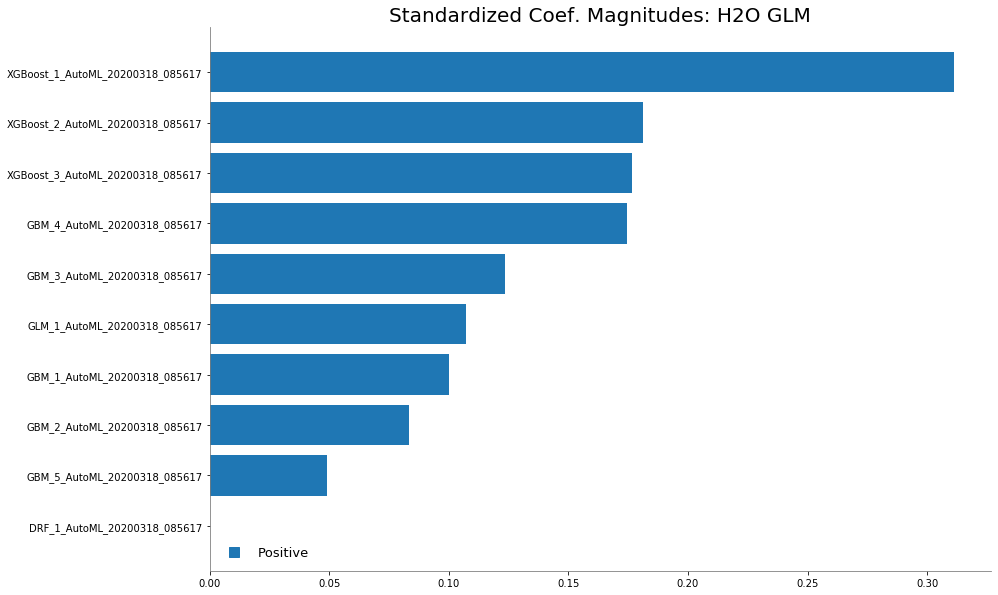

In [13]:
%matplotlib inline
metalearner.std_coef_plot()

## Save model

In [14]:
# Save the Best Model
h2o.save_model(model=aml.leader, path='./')

'/notebooks/StackedEnsemble_AllModels_AutoML_20200318_085617'

In [15]:
# Save specific model
h2o.save_model(model=h2o.get_model(model_ids[-1]),
               path='./')

'/notebooks/GLM_1_AutoML_20200318_085617'

## Log with MLFlow

In [16]:
# Import MLFLow dependencies
import mlflow
import mlflow.h2o

In [17]:
# Get Metrics Names before MLFlow logs them
metrics_names = lb.columns[1:]
metrics_names

['auc',
 'logloss',
 'aucpr',
 'mean_per_class_error',
 'rmse',
 'mse',
 'training_time_ms',
 'predict_time_per_row_ms']

In [18]:
mlflow.set_tracking_uri('./mlruns/')

In [19]:
for i in range(len(lb)):
    model_id = lb[i, 'model_id']
    
    with mlflow.start_run(run_name=model_id):
        print("{model_id} model metrics".format(model_id=model_id))
        
        for metrics_name in metrics_names:
            metric = lb[i, metrics_name]
            print("  {metrics_name} = {metric}".format(metrics_name=metrics_name,
                                                       metric=metric))
            mlflow.log_metric(metrics_name, metric)
        
        mlflow.h2o.log_model(h2o.get_model(model_id), "model")

StackedEnsemble_AllModels_AutoML_20200318_085617 model metrics
  auc = 0.7884943086885449
  logloss = 0.5536564863051258
  aucpr = 0.8067942794870006
  mean_per_class_error = 0.31935286733117985
  rmse = 0.4331162430860722
  mse = 0.1875896800249936
  training_time_ms = 3535.0
  predict_time_per_row_ms = 0.231121
StackedEnsemble_BestOfFamily_AutoML_20200318_085617 model metrics
  auc = 0.7863473752131169
  logloss = 0.5557610797952202
  aucpr = 0.8046586350385025
  mean_per_class_error = 0.3152660410890309
  rmse = 0.4340863858887624
  mse = 0.18843099041396755
  training_time_ms = 1587.0
  predict_time_per_row_ms = 0.08393
XGBoost_1_AutoML_20200318_085617 model metrics
  auc = 0.7841691327511066
  logloss = 0.5554293837832908
  aucpr = 0.8047173111044984
  mean_per_class_error = 0.3188679794364182
  rmse = 0.43442654477923154
  mse = 0.18872642280882168
  training_time_ms = 7268.0
  predict_time_per_row_ms = 0.010207
XGBoost_3_AutoML_20200318_085617 model metrics
  auc = 0.78297427344

## Shutdown H2O

In [20]:
h2o.cluster().shutdown()

H2O session _sid_af52 closed.
